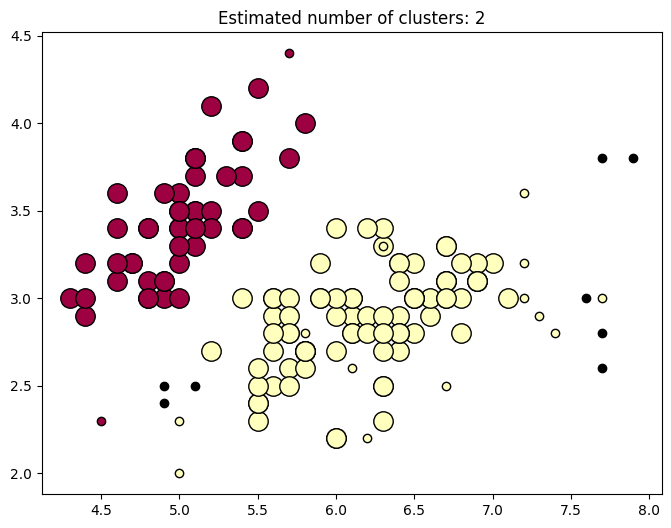

Silhouette Score: 0.5385919451236434


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
X = iris.data

eps = 0.7
min_samples = 10
metric = 'euclidean'

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
dbscan.fit(X)

labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


# Compare kmeans clustering and dbscan

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=64)
kmeans_labels = kmeans.fit_predict(X) #loaded in previous cell

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X) #loaded in previous cell

# Performance metrics
kmeans_silhouette = silhouette_score(X, kmeans_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan_labels)

kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(X, dbscan_labels)

print("K-means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("\nK-means Davies-Bouldin Index:", kmeans_davies_bouldin)
print("DBSCAN Davies-Bouldin Index:", dbscan_davies_bouldin)
print("\nK-means Calinski-Harabasz Index:", kmeans_calinski_harabasz)
print("DBSCAN Calinski-Harabasz Index:", dbscan_calinski_harabasz)


K-means Silhouette Score: 0.5528190123564095
DBSCAN Silhouette Score: 0.42268527358327035

K-means Davies-Bouldin Index: 0.6619715465007465
DBSCAN Davies-Bouldin Index: 3.75381894286625

K-means Calinski-Harabasz Index: 561.62775662962
DBSCAN Calinski-Harabasz Index: 203.32343586080995


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1. **Silhouette Score**:
    - K-means: 0.5528
    - DBSCAN: 0.4226
    
    K-means has a higher silhouette score, indicating better clustering quality in terms of cohesion and separation of clusters.
    
2. **Davies-Bouldin Index**:
    - K-means: 0.66197
    - DBSCAN: 3.7538
    
    K-means has a significantly lower Davies-Bouldin index, indicating better clustering quality in terms of intra-cluster similarity and inter-cluster dissimilarity.
    
3. **Calinski-Harabasz Index**:
    - K-means: 561.6277
    - DBSCAN: 203.3234
    
    K-means has a higher Calinski-Harabasz index, indicating better clustering quality in terms of the ratio of between-cluster dispersion to within-cluster dispersion.

Based on these metrics, K-means appears to perform better than DBSCAN for the Iris dataset. K-means achieves higher silhouette scores, lower Davies-Bouldin index values, and higher Calinski-Harabasz index values, indicating better clustering quality overall.
